In [1]:
from ase.build import bulk
from ase.visualize.plot import plot_atoms
from ase.build.surfaces_with_termination import surfaces_with_termination
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(25,10))
import numpy as np
import Tools as tl
from ase.build import sort
from ase.io.vasp import read_vasp
from ase.build import surface, make_supercell

In [2]:
zro2 = read_vasp('Structure/POSCAR')

In [3]:
ZrO2001Oterm = surfaces_with_termination(zro2, [0,0,1],layers=4, vacuum=15., termination='O',verbose=True, symmetric=True)

([4], ['Zr']) ([20], ['O'])
([3], ['O']) ([18], ['O'])
([5], ['Zr']) ([21], ['O'])
([2], ['O']) ([19], ['O'])


(<Axes:>, <Axes:>, <Axes:>)

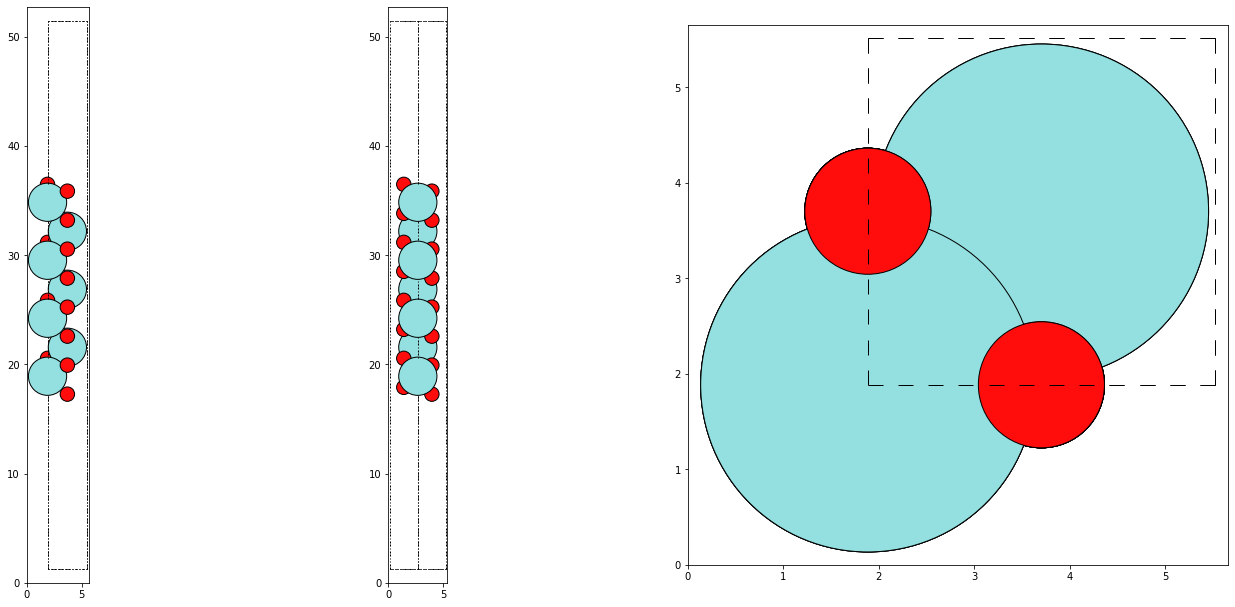

In [4]:
tl.plotviews(ZrO2001Oterm[0])

### · Creo Celda 2x2

In [5]:
ZrO2001Oterm_2x2_unsorted = [make_supercell(thisurface,[[2,0,0],[0,2,0],[0,0,1]],tol=1e-10, wrap=True) for thisurface in ZrO2001Oterm]

In [6]:
from ase.build import sort

In [7]:
ZrO2001Oterm_2x2 = [sort(thissurface.copy()) for thissurface in ZrO2001Oterm_2x2_unsorted]

(<Axes:>, <Axes:>, <Axes:>)

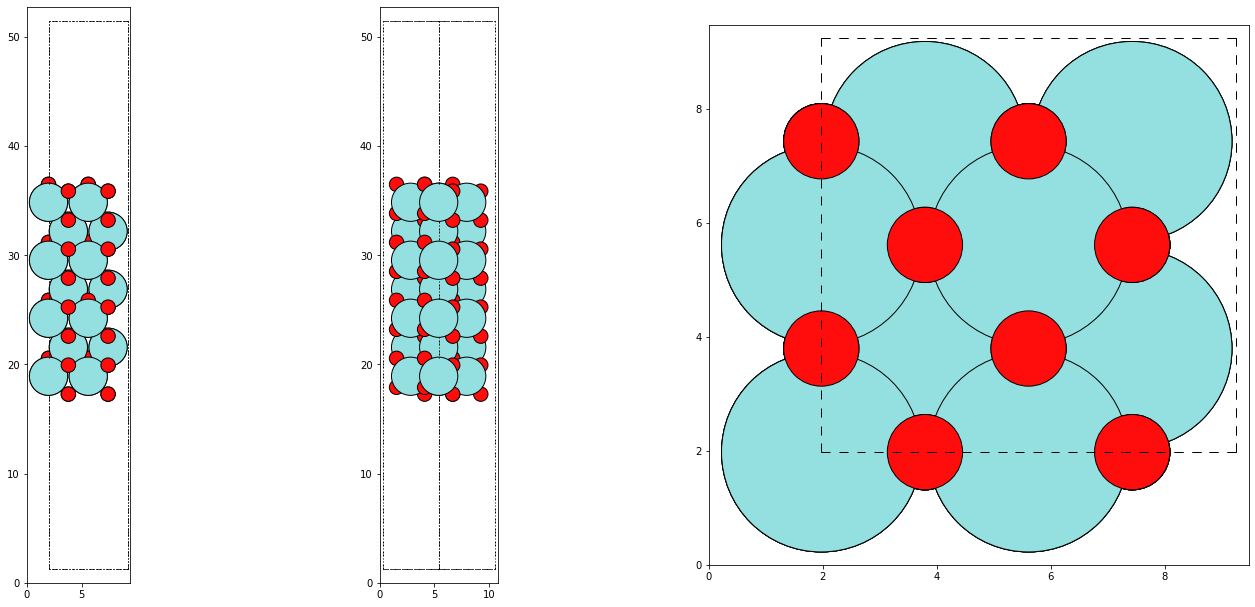

In [8]:
tl.plotviews(ZrO2001Oterm_2x2[0])

## Creo sitios 'hollow' - Puede hacerse un for cuando funcione bien

In [9]:
SitesZrO2 = []
title=['hollow']
tl.get_adsite(ZrO2001Oterm_2x2[0], site='hollow', face='top')
SitesZrO2.append(tl.make_adstruc(ZrO2001Oterm_2x2[0], 'RotBotTop', theface='top', thesite='hollow'))
title.append('top')
tl.get_adsite(ZrO2001Oterm_2x2[0], site='top', face='top')
SitesZrO2.append(tl.make_adstruc(ZrO2001Oterm_2x2[0], 'RotBotTop', theface='top', thesite='top'))

title.append('bridge')
tl.get_adsite(ZrO2001Oterm_2x2[0], site='bridge', face='top')
SitesZrO2.append(tl.make_adstruc(ZrO2001Oterm_2x2[0], 'RotBotTop', theface='top', thesite='bridge'))


# ahi tenes el for cantado

[13, 14, 29, 30, 45, 46, 61, 62]


Text(0.5, 1.0, 'bridge')

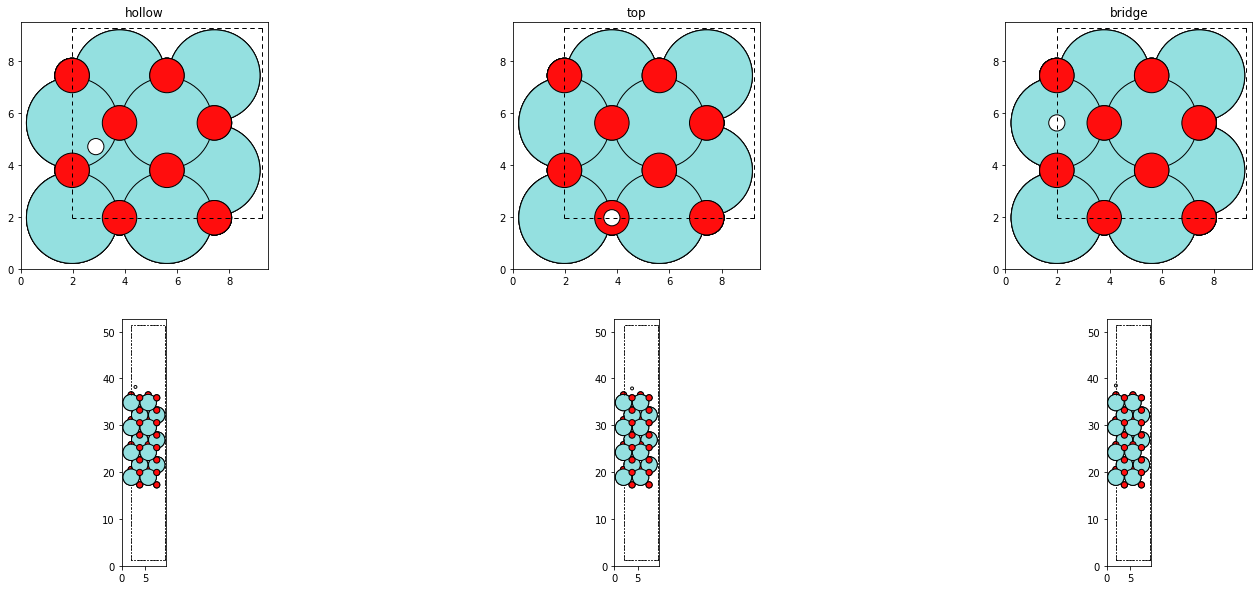

In [10]:
fig, ax = plt.subplots(2, 3)
plot_atoms(SitesZrO2[0], ax=ax[0,0])
plot_atoms(SitesZrO2[0], ax=ax[1,0], rotation='-90x')
ax[0,0].set_title(title[0])
plot_atoms(SitesZrO2[1], ax=ax[0,1])
plot_atoms(SitesZrO2[1], ax=ax[1,1], rotation='-90x')
ax[0,1].set_title(title[1])
plot_atoms(SitesZrO2[2], ax=ax[0,2])
plot_atoms(SitesZrO2[2], ax=ax[1,2], rotation='-90x')
ax[0,2].set_title(title[2])
#plot_atoms(SitesZrO2[4], ax=ax[3])

lo que quisiera es que el hollow este en el sitio que tiene el hueco abajo,